<a href="https://colab.research.google.com/github/suryawahyus/MachineLearning/blob/main/TaskWeek6/K_Means_Clustering_menggunakan_google_colab_dengan_dataset_lainnya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Path ke file dataset di Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/dataset/attacking.csv'

# Membaca dataset dan membuat DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [9]:
# Menghapus kolom 'CustomerID' dan 'Gender'
df = df.drop(['serial', 'club', 'player_name', 'position'], axis=1)

# Menampilkan DataFrame setelah menghapus kolom
df.head()

,assists,corner_taken,offsides,dribbles,match_played
0,7,10,2,7,7
1,6,3,4,83,13
2,6,3,3,32,10
3,5,3,4,28,7
4,4,36,0,9,9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

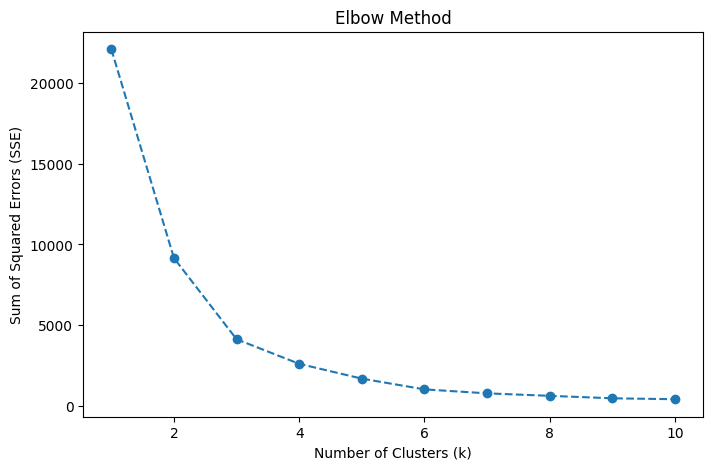

In [12]:
# Mengambil atribut yang akan digunakan untuk clustering
data_for_clustering = df[['assists', 'dribbles']]

# Inisialisasi nilai SSE (Sum of Squared Errors)
sse = []

# Melakukan iterasi untuk nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    sse.append(kmeans.inertia_)

# Memvisualisasikan Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


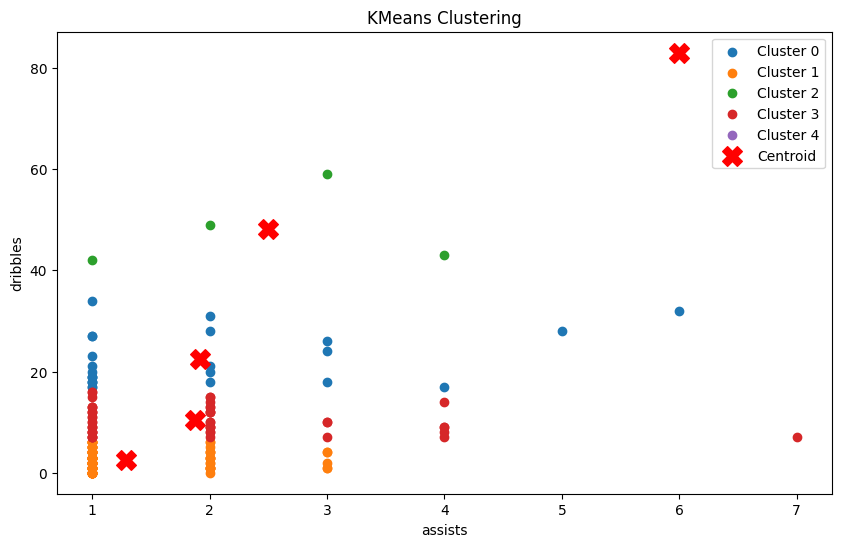

In [13]:
# Mengambil atribut yang akan digunakan untuk clustering
data_for_clustering = df[['assists', 'dribbles']]

# Inisialisasi model KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Melakukan clustering dan menambahkan kolom 'Label' ke DataFrame
df['Label'] = kmeans.fit_predict(data_for_clustering)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))

# Memvisualisasikan data untuk setiap kluster
for label in range(5):
    cluster_data = df[df['Label'] == label]
    plt.scatter(cluster_data['assists'], cluster_data['dribbles'], label=f'Cluster {label}')

# Menampilkan centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroid')

plt.title('KMeans Clustering')
plt.xlabel('assists')
plt.ylabel('dribbles')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


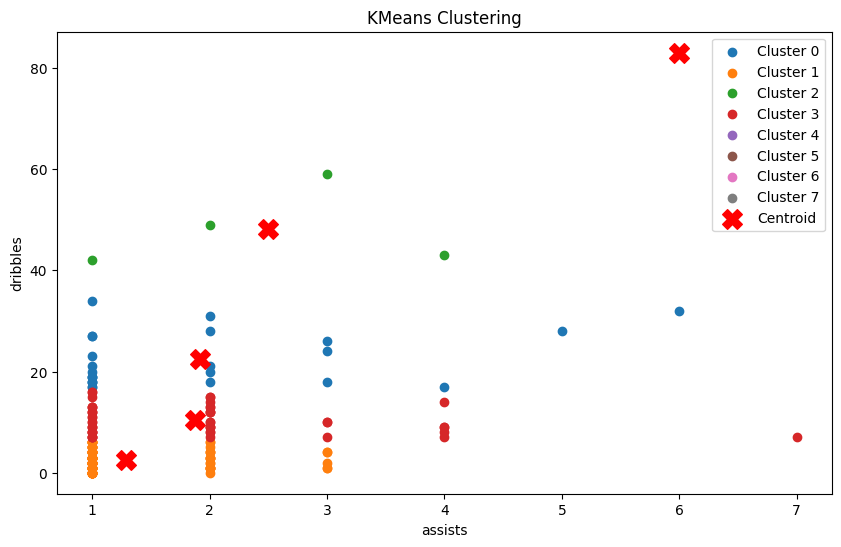

In [14]:
# Mengambil atribut yang akan digunakan untuk clustering
data_for_clustering = df[['assists', 'dribbles']]

# Inisialisasi model KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Melakukan clustering dan menambahkan kolom 'Label' ke DataFrame
df['Label'] = kmeans.fit_predict(data_for_clustering)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))

# Memvisualisasikan data untuk setiap kluster
for label in range(8):
    cluster_data = df[df['Label'] == label]
    plt.scatter(cluster_data['assists'], cluster_data['dribbles'], label=f'Cluster {label}')

# Menampilkan centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroid')

plt.title('KMeans Clustering')
plt.xlabel('assists')
plt.ylabel('dribbles')
plt.legend()
plt.show()

In [15]:
# Menyiapkan list untuk menyimpan nilai silhouette score
silhouette_scores = []

# Menghitung silhouette score untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_for_clustering)
    silhouette_avg = silhouette_score(data_for_clustering, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan nilai silhouette score untuk setiap nilai k
for k, score in zip(range(2, 11), silhouette_scores):
    print(f'For k = {k}, Silhouette Score = {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For k = 2, Silhouette Score = 0.7344
For k = 3, Silhouette Score = 0.6488
For k = 4, Silhouette Score = 0.6074
For k = 5, Silhouette Score = 0.5829
For k = 6, Silhouette Score = 0.5739
For k = 7, Silhouette Score = 0.5165
For k = 8, Silhouette Score = 0.5145
For k = 9, Silhouette Score = 0.5103
For k = 10, Silhouette Score = 0.4897


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Menyiapkan list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Menghitung Davies-Bouldin Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_for_clustering)
    dbi_score = davies_bouldin_score(data_for_clustering, labels)
    dbi_scores.append(dbi_score)

# Menampilkan nilai Davies-Bouldin Index untuk setiap nilai k
for k, score in zip(range(2, 11), dbi_scores):
    print(f'For k = {k}, Davies-Bouldin Index = {score:.4f}')

For k = 2, Davies-Bouldin Index = 0.5576
For k = 3, Davies-Bouldin Index = 0.5114
For k = 4, Davies-Bouldin Index = 0.5346
For k = 5, Davies-Bouldin Index = 0.4653
For k = 6, Davies-Bouldin Index = 0.4629
For k = 7, Davies-Bouldin Index = 0.5102
For k = 8, Davies-Bouldin Index = 0.4560
For k = 9, Davies-Bouldin Index = 0.4696
For k = 10, Davies-Bouldin Index = 0.5358


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [17]:
# Menyiapkan list untuk menyimpan nilai Calinski-Harabasz Index
chi_scores = []

# Menghitung Calinski-Harabasz Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_for_clustering)
    chi_score = calinski_harabasz_score(data_for_clustering, labels)
    chi_scores.append(chi_score)

# Menampilkan nilai Calinski-Harabasz Index untuk setiap nilai k
for k, score in zip(range(2, 11), chi_scores):
    print(f'For k = {k}, Calinski-Harabasz Index = {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For k = 2, Calinski-Harabasz Index = 246.3490
For k = 3, Calinski-Harabasz Index = 377.7057
For k = 4, Calinski-Harabasz Index = 431.1624
For k = 5, Calinski-Harabasz Index = 521.0094
For k = 6, Calinski-Harabasz Index = 709.8000
For k = 7, Calinski-Harabasz Index = 785.9262
For k = 8, Calinski-Harabasz Index = 845.1652
For k = 9, Calinski-Harabasz Index = 987.0759
For k = 10, Calinski-Harabasz Index = 1000.2048


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
